In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

1) Use the dataset named ‘Airline Satisfaction.xlsx’: It contains the data of 10000 airline customers and their details. Build a classification model to solve the below questions. Satisfaction is the target column

a) What is the accuracy if the problem is solved using Random Forest model?

b) What is the accuracy if the problem is solved using Support Vector Machine model?
My assumptions: 1 means Satisfied and 2 is not satisfied

In [2]:
df=pd.read_excel("Airline Satisfaction.xlsx")
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


In [3]:
pd.set_option("display.float_format",lambda x:"%.3f"%x)
df.isnull().sum()/len(df)

id                                  0.000
Gender                              0.000
Customer Type                       0.000
Age                                 0.000
Type of Travel                      0.000
Class                               0.000
Flight Distance                     0.000
Inflight wifi service               0.000
Departure/Arrival time convenient   0.000
Ease of Online booking              0.000
Gate location                       0.000
Food and drink                      0.000
Online boarding                     0.000
Seat comfort                        0.000
Inflight entertainment              0.000
On-board service                    0.000
Leg room service                    0.000
Baggage handling                    0.000
Checkin service                     0.000
Inflight service                    0.000
Cleanliness                         0.000
Departure Delay in Minutes          0.000
Arrival Delay in Minutes            0.003
satisfaction                      

In [4]:
df.dropna(axis=0,inplace=True)  #Dropping The null columns less than 0.001 are missing so we 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9974 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 9974 non-null   int64  
 1   Gender                             9974 non-null   object 
 2   Customer Type                      9974 non-null   object 
 3   Age                                9974 non-null   int64  
 4   Type of Travel                     9974 non-null   object 
 5   Class                              9974 non-null   object 
 6   Flight Distance                    9974 non-null   int64  
 7   Inflight wifi service              9974 non-null   int64  
 8   Departure/Arrival time convenient  9974 non-null   int64  
 9   Ease of Online booking             9974 non-null   int64  
 10  Gate location                      9974 non-null   int64  
 11  Food and drink                     9974 non-null   int64

In [6]:
df.iloc[:,-1].value_counts()

0    5673
1    4301
Name: satisfaction, dtype: int64

In [7]:
df.drop(columns="id",inplace=True)

# EDA

In [8]:
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000,9974.000
mean,39.298,1198.815,2.732,3.039,2.754,2.970,3.208,3.241,3.411,3.335,3.366,3.347,3.620,3.286,3.628,3.267,14.778,15.242,0.431
std,15.123,1001.808,1.328,1.528,1.403,1.284,1.340,1.351,1.326,1.341,1.289,1.311,1.190,1.269,1.181,1.321,38.249,38.810,0.495
min,7.000,31.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,27.000,413.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,2.000,3.000,2.000,3.000,2.000,0.000,0.000,0.000
50%,40.000,852.500,3.000,3.000,3.000,3.000,3.000,3.000,4.000,4.000,4.000,4.000,4.000,3.000,4.000,3.000,0.000,0.000,0.000
75%,51.000,1747.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,4.000,5.000,4.000,5.000,4.000,13.000,13.000,1.000
max,85.000,4983.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,5.000,1305.000,1280.000,1.000


In [9]:
df.describe(include="O")

,Gender,Customer Type,Type of Travel,Class
count,9974,9974,9974,9974
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,5096,8181,6926,4821


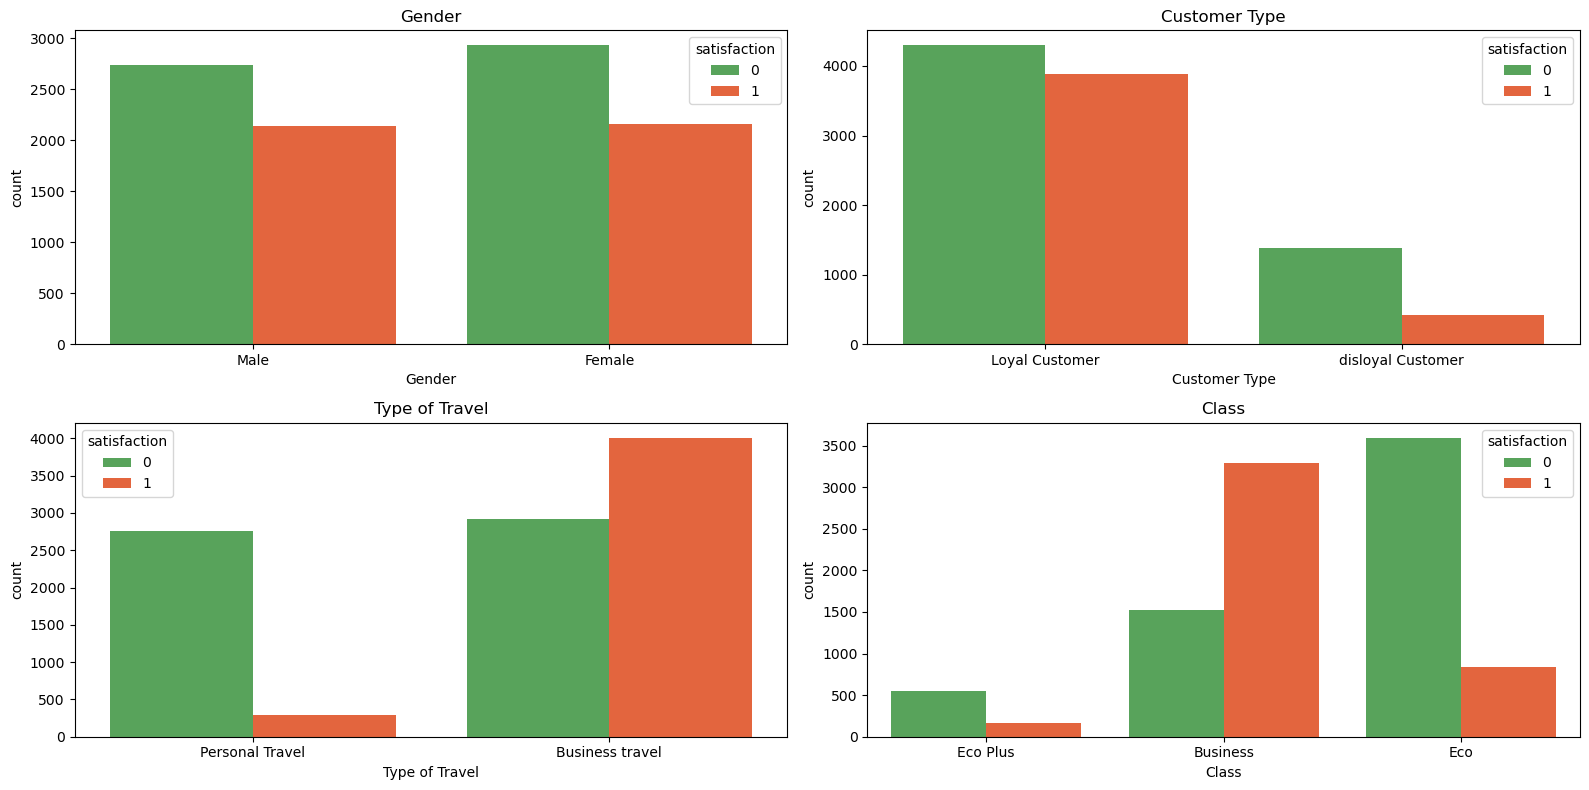

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palette
custom_palette = ["#4CAF50", "#FF5722"]  # Green and Orange

plt.figure(figsize=(16, 8))
for i, col in enumerate(df.columns[df.dtypes == "object"]):
    plt.subplot(2, 2, i + 1)
    plt.title(f"{col}")
    sns.countplot(data=df, x=col, hue="satisfaction", palette=custom_palette)
    plt.tight_layout()

plt.show()

# Observations:

  Gender does not significantly influence satisfaction, as both genders exhibit similar patterns.

  Customer type displays consistent patterns across the categories, indicating no notable differences in satisfaction levels.

  Business travelers tend to express higher satisfaction compared to other travel purposes.

  Within the class category, passengers in Business class tend to report higher satisfaction levels than those in Economy and Economy Plus

These observations provide surface-level insights. Further analysis could delve into the satisfaction percentages within each subclass, revealing additional nuances and hidden details.






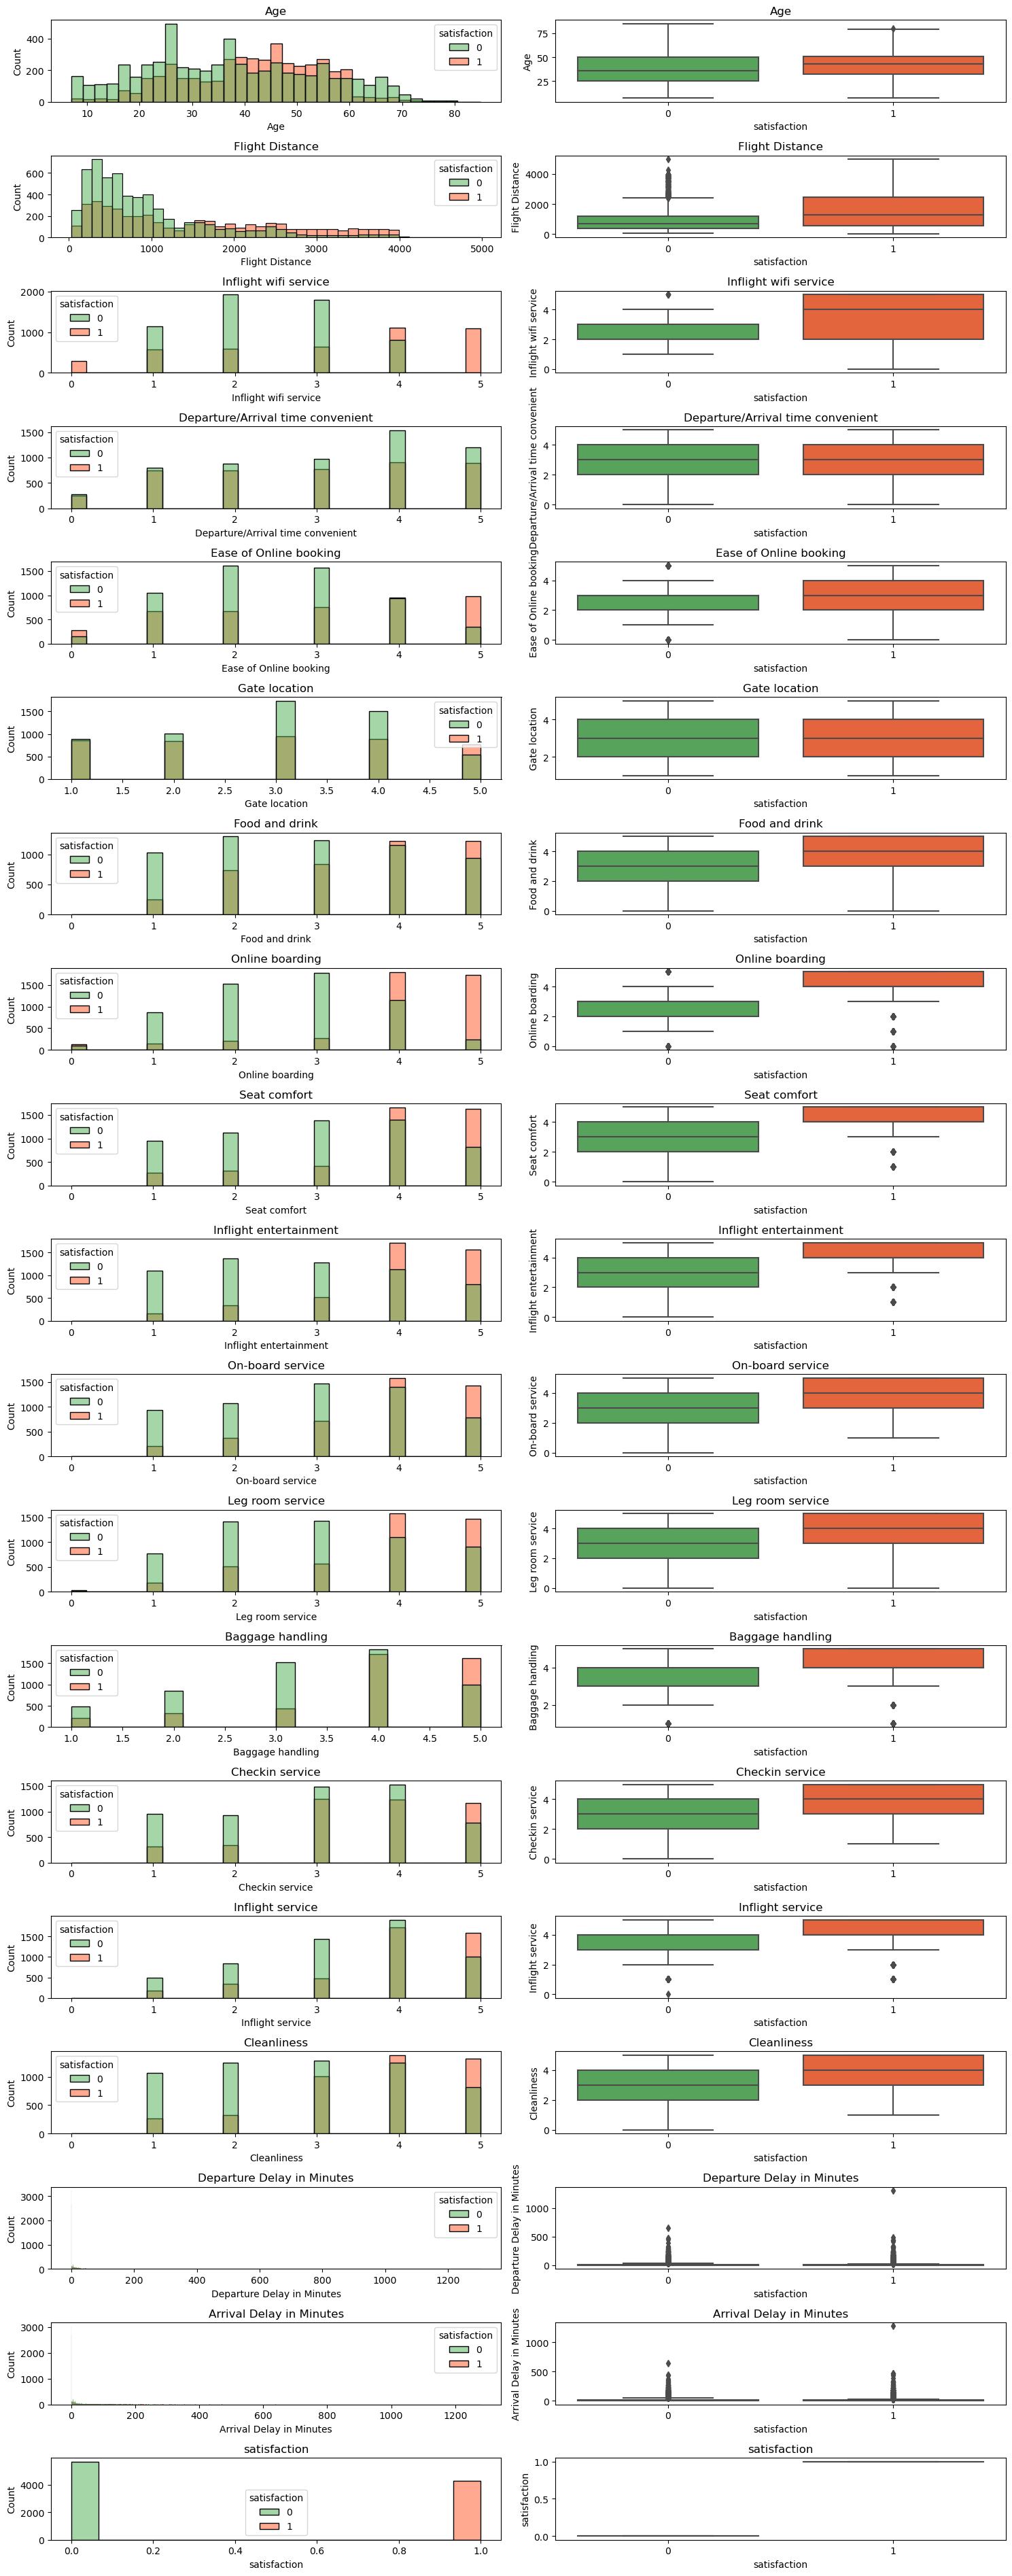

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define custom color palette
custom_palette = ["#4CAF50", "#FF5722"]  # Green and Orange

plt.figure(figsize=(15, 38)) 
for i, col in enumerate(df.columns[df.dtypes != "object"]):
    plt.subplot(19, 2, 2*i+1)
    plt.title(f"{col}")
    sns.histplot(df, x=col, hue="satisfaction", palette=custom_palette)
    plt.subplot(19, 2, 2*i+2)
    plt.title(f"{col}")
    sns.boxplot(df, y=col, x="satisfaction", palette=custom_palette)
plt.subplots_adjust(hspace=0.5) 
plt.tight_layout()
plt.show()

# Inferences:
The ouliers present in the data are also explanatory factors of Satisfaction but not for all the columns if we were to do univariate analaysis this patterns won't have been visible


Univariate,Bivariate and Multivariate analysis could help in explaining the latent and global factors in the data as our problem is to build a classification model Using Random Forest and SVM we will not be going deep into these analysis but yes these are things that if explored could help you in making better decisions regarding the data

In [15]:
y=df.iloc[:,-1]
x=df.drop(columns="satisfaction")

In [16]:
numeric_columns = x.select_dtypes(include=['float64', 'int64']).columns
df_numeric = x[numeric_columns]
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

<Axes: >

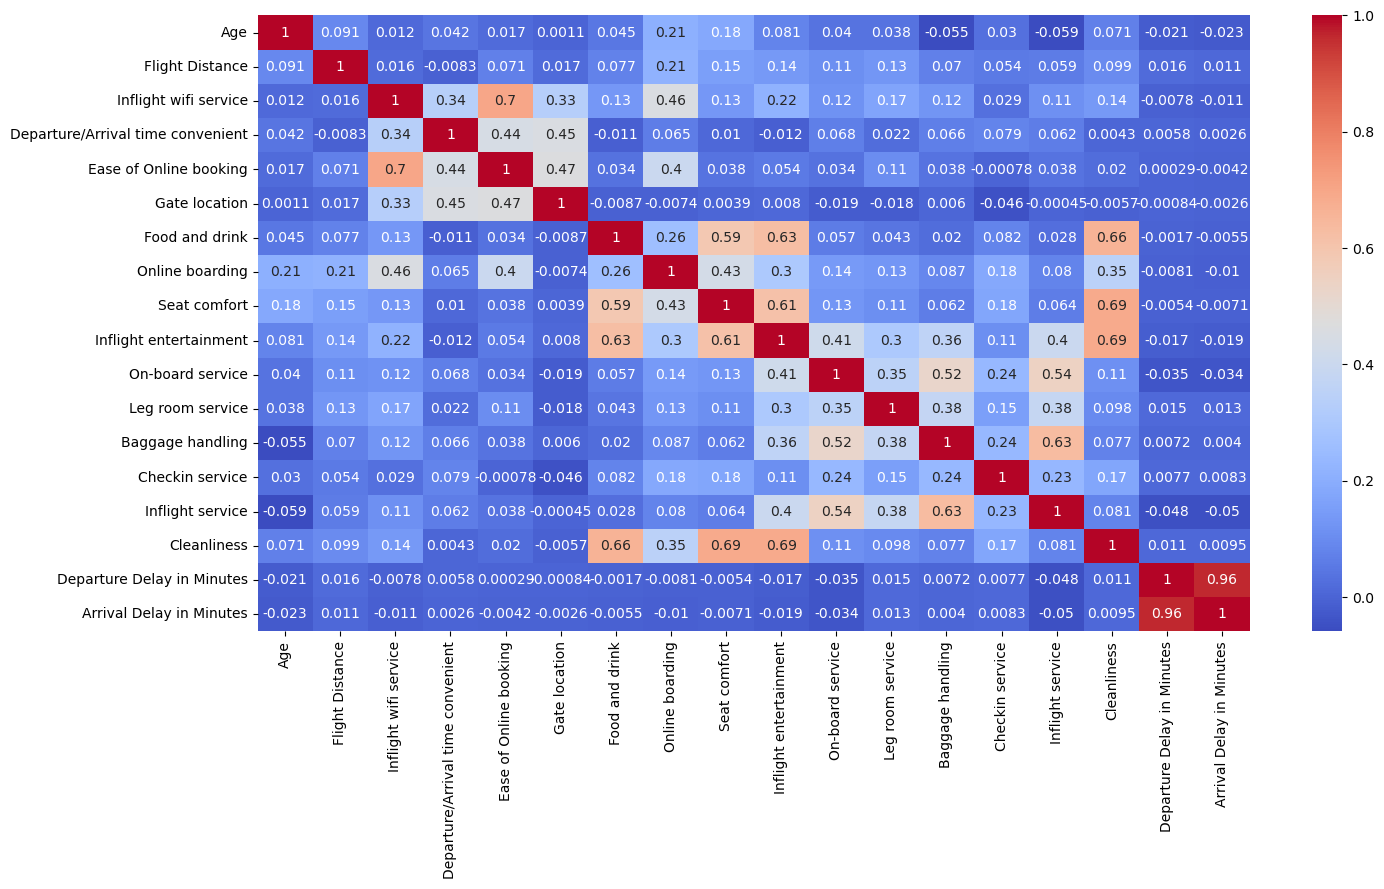

In [17]:
plt.figure(figsize=(16,8))
sn.heatmap(correlation_matrix,annot=True,cmap="coolwarm")

# Feature Transformation:

Random Forest: Scaling does not significantly impact performance.
SVM: Scaling may enhance performance.
Feature Selection:

Random Forest: Automatically identifies important features while disregarding less influential ones. Various libraries in sklearn can aid in this process.
SVM: Techniques such as Recursive Feature Elimination (RFE), Backward or Forward elimination, among others, can be utilized for feature selection.
Additionally, our data contains multicollinear features, which will be addressed later to further improve model performance.

In [18]:
object_columns = x.select_dtypes(exclude=['float64', 'int64']).columns

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [20]:
x[numeric_columns]=scaler.fit_transform(x[numeric_columns])
x.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,Male,Loyal Customer,-1.739,Personal Travel,Eco Plus,-0.738,0.202,0.629,0.175,-1.534,...,1.198,1.242,0.492,-0.265,0.319,0.563,1.162,1.312,0.267,0.071
1,Male,disloyal Customer,-0.945,Business travel,Business,-0.962,0.202,-0.680,0.175,0.024,...,-1.818,-1.742,-1.836,1.261,-0.521,-1.802,0.315,-1.716,-0.360,-0.238
2,Female,Loyal Customer,-0.879,Business travel,Business,-0.057,-0.551,-0.680,-0.538,-0.755,...,1.198,1.242,0.492,-0.265,0.319,0.563,0.315,1.312,-0.386,-0.393
3,Female,Loyal Customer,-0.945,Business travel,Business,-0.636,-0.551,1.284,1.601,1.581,...,-1.064,-0.996,-1.060,1.261,-0.521,-1.802,0.315,-0.959,-0.099,-0.161
4,Male,Loyal Customer,1.435,Business travel,Business,-0.983,0.202,-0.025,0.175,0.024,...,1.198,-0.250,-0.284,0.498,0.319,-0.225,-0.531,-0.202,-0.386,-0.393


In [21]:
x_new=pd.get_dummies(x,columns=object_columns,drop_first=True)

In [22]:
x_new.head()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,...,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,-1.739,-0.738,0.202,0.629,0.175,-1.534,1.338,-0.178,1.198,1.242,...,0.563,1.162,1.312,0.267,0.071,1,0,1,0,1
1,-0.945,-0.962,0.202,-0.680,0.175,0.024,-1.648,-0.178,-1.818,-1.742,...,-1.802,0.315,-1.716,-0.360,-0.238,1,1,0,0,0
2,-0.879,-0.057,-0.551,-0.680,-0.538,-0.755,1.338,1.303,1.198,1.242,...,0.563,0.315,1.312,-0.386,-0.393,0,0,0,0,0
3,-0.945,-0.636,-0.551,1.284,1.601,1.581,-0.902,-0.919,-1.064,-0.996,...,-1.802,0.315,-0.959,-0.099,-0.161,0,0,0,0,0
4,1.435,-0.983,0.202,-0.025,0.175,0.024,0.591,1.303,1.198,-0.250,...,-0.225,-0.531,-0.202,-0.386,-0.393,1,0,0,0,0


In [23]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV

In [24]:
X_train,X_test,y_train,y_test=train_test_split(x_new,y,test_size=0.2,random_state=42)

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

# Hyper parameter tuning

In [28]:
svc_param_dist = {
    'C': range(1, 10),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.1, 1, 10]
}

svc_clf = SVC()
svc_random_search = RandomizedSearchCV(estimator=svc_clf, param_distributions=svc_param_dist, n_iter=10, cv=5,
                                       scoring='accuracy', n_jobs=-1, random_state=42,verbose=True)
svc_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
                   param_distributions={'C': range(1, 10),
                                        'gamma': ['scale', 'auto', 0.1, 1, 10],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=True)

In [29]:
svc_random_search.best_params_

{'kernel': 'rbf', 'gamma': 'scale', 'C': 3}

In [30]:
svc_random_search.best_score_

0.9368336201004077

In [31]:
#Best Hyperparameters:{'n_estimators': 150, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
#Best Accuracy: 0.9422231912068572
param_dist = {
    'n_estimators': np.arange(110,200,step=10),
    'max_features': ['log2'],
    'max_depth': np.arange(15,25,step=1),
    'min_samples_split': [3,4,5,6,7],
    'min_samples_leaf': [1]
}
rf_classifier = RandomForestClassifier()
random_search = RandomizedSearchCV(
    rf_classifier,
    param_distributions=param_dist,
    n_iter=10, 
    cv=5,  
    scoring='accuracy', 
    random_state=42  )

# Fit the RandomizedSearchCV object to the data
random_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print("Best Hyperparameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)

Best Hyperparameters: {'n_estimators': 180, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
Best Accuracy: 0.9423485830563869


# Observations:


Random Forest:
Best Hyperparameters: {'n_estimators': 120, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 22}


Best Accuracy Achieved: 0.9427


Support Vector Classifier:
Best Hyperparameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 3}


Best Accuracy Achieved: 0.9368
Both Support Vector Classifier and Random Forest models exhibit comparable accuracies, with Random Forest slightly outperforming SVM.

# Model Traning and Evaluation 

In [33]:
svc = SVC(kernel="rbf",gamma="scale",C=3)
rf=RandomForestClassifier(n_estimators=120,min_samples_leaf=1,min_samples_split=4,max_features="log2",max_depth=22)

In [34]:
svc.fit(X_train,y_train)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=22, max_features='log2', min_samples_split=4,
                       n_estimators=120)

In [35]:
print("SVM \n")
print(classification_report(y_test,svc.predict(X_test)))
print("Random Forest \n")
print(classification_report(y_test,rf.predict(X_test)))

SVM 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1132
           1       0.94      0.92      0.93       863

    accuracy                           0.94      1995
   macro avg       0.94      0.94      0.94      1995
weighted avg       0.94      0.94      0.94      1995

Random Forest 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1132
           1       0.95      0.92      0.93       863

    accuracy                           0.94      1995
   macro avg       0.94      0.94      0.94      1995
weighted avg       0.94      0.94      0.94      1995



<Axes: >

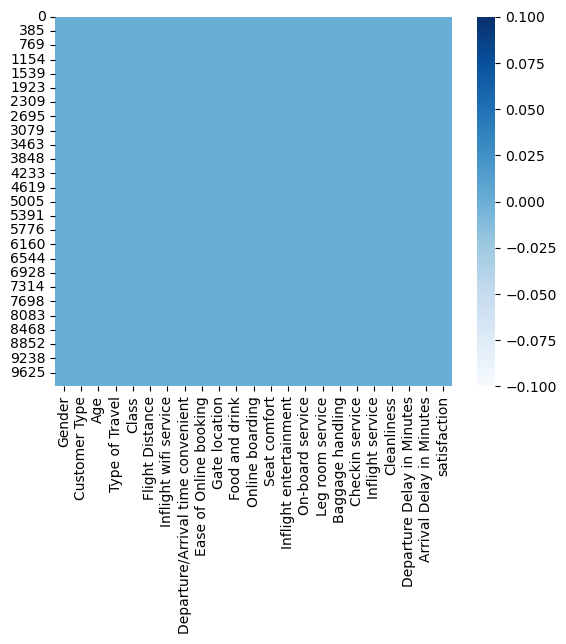

In [36]:
# import missingno
# # Plot graphic of missing values
# missingno.matrix(data, figsize = (30,20))


sns.heatmap(df.isnull(),cmap='Blues')

Potential Enhancements:


Addressing Multicollinearity: Resolving multicollinearity may enhance performance by reducing redundant information.

For Random Forest: Utilize mutual information criteria for feature selection to identify and retain the most informative features.

Outlier Management: Identifying and appropriately handling outliers can potentially improve model performance by reducing their influence.

Principal Component Analysis (PCA): Be cautious as PCA might negatively impact performance.

Exploring Alternative Feature Selection Techniques: Consider other feature selection methods to optimize model performance further.



# Conclusions:
Both Random Forest and SVM models demonstrate a prediction accuracy of 94%, indicating their effectiveness in the task at hand.